# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



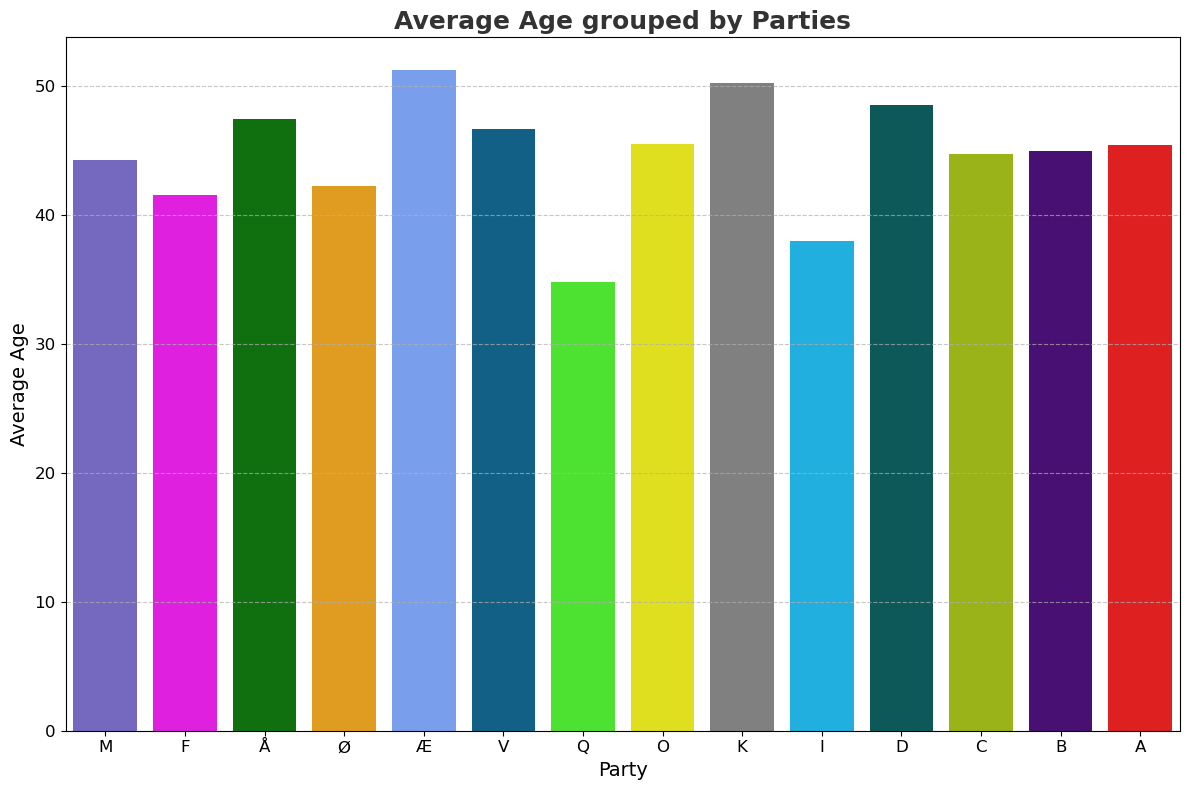

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk

data = pd.read_excel('alldata.xlsx')

data_filtered = data.loc[data['alder'] != 0]
data_filtered = data_filtered.loc[data['parti'] != 'Løsgænger']
data_filtered = data_filtered.dropna()
data_filtered.head()

data_filtered["parti"] = data_filtered["parti"].replace("Socialdemokratiet", "A")
data_filtered["parti"] = data_filtered["parti"].replace("Radikale Venstre", "B")
data_filtered["parti"] = data_filtered["parti"].replace("Det Konservative Folkeparti", "C")
data_filtered["parti"] = data_filtered["parti"].replace("Nye Borgerlige", "D")
data_filtered["parti"] = data_filtered["parti"].replace("Socialistisk Folkeparti", "F")
data_filtered["parti"] = data_filtered["parti"].replace("Liberal Alliance", "I")
data_filtered["parti"] = data_filtered["parti"].replace("Kristendemokraterne", "K")
data_filtered["parti"] = data_filtered["parti"].replace("Moderaterne", "M")
data_filtered["parti"] = data_filtered["parti"].replace("Dansk Folkeparti", "O")
data_filtered["parti"] = data_filtered["parti"].replace("Frie Grønne, Danmarks Nye Venstrefløjsparti", "Q")
data_filtered["parti"] = data_filtered["parti"].replace("Venstre", "V")
data_filtered["parti"] = data_filtered["parti"].replace("Danmarksdemokraterne", "Æ")
data_filtered["parti"] = data_filtered["parti"].replace("Enhedslisten", "Ø")
data_filtered["parti"] = data_filtered["parti"].replace("Alternativet", "Å")

parti_colors = {
    "A": "#ff0000",
    "B": "#4b0082",
    "C": "#aacc00",
    "D": "#006666",
    "F": "#ff00ff",
    "I": "#00bfff",
    "K": "#808080",
    "M": "#6a5acd",
    "O": "#ffff00",
    "Q": "#39ff14",
    "V": "#006699",
    "Æ": "#6699ff",
    "Ø": "#ffa500",
    "Å": "#008000",
}
data_filtered['color'] = data_filtered['parti'].map(parti_colors)

plt.figure(figsize=(12,8))
sns.barplot(x="parti", y="alder", data=data_filtered, hue="parti", estimator=np.mean, errorbar=None, palette=parti_colors, legend=False)
plt.title("Average Age grouped by Parties", fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Party', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




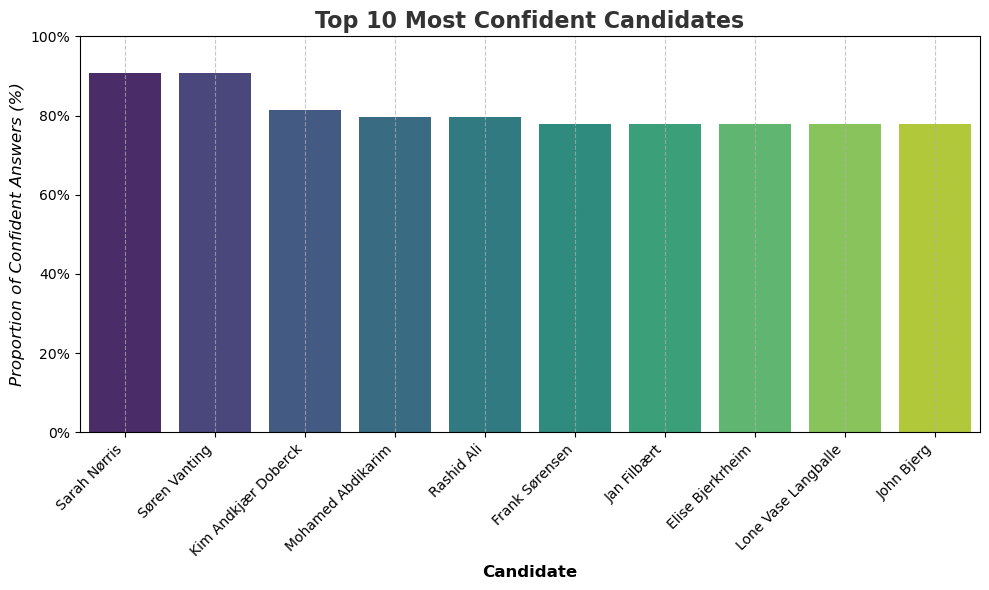

In [24]:
def calculate_confidence(row):
    total_answers = len(row)
    confident_answers = sum((row == 2) | (row == -2))
    proportion_confidence = confident_answers/total_answers
    return proportion_confidence

data_filtered['confidence'] = data_filtered.apply(calculate_confidence, axis=1)
data_sorted = data_filtered.sort_values(by='confidence', ascending=False)
data_sorted['confidence'] = data_sorted['confidence'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='navn', y='confidence', data=data_sorted.head(10), hue='navn', palette="viridis", dodge=False)
plt.title('Top 10 Most Confident Candidates', fontsize=16, fontweight='bold', color='#333')
plt.ylabel('Proportion of Confident Answers (%)', fontsize=12, fontstyle='italic')
plt.xlabel('Candidate', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(tick)}%' for tick in plt.yticks()[0]], fontsize=10)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\romam\AppData\Local\Temp\ipykernel_24344\4152245652.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Intra-party Disagreement', y='parti', data=most_disagreement_parties, palette='viridis')


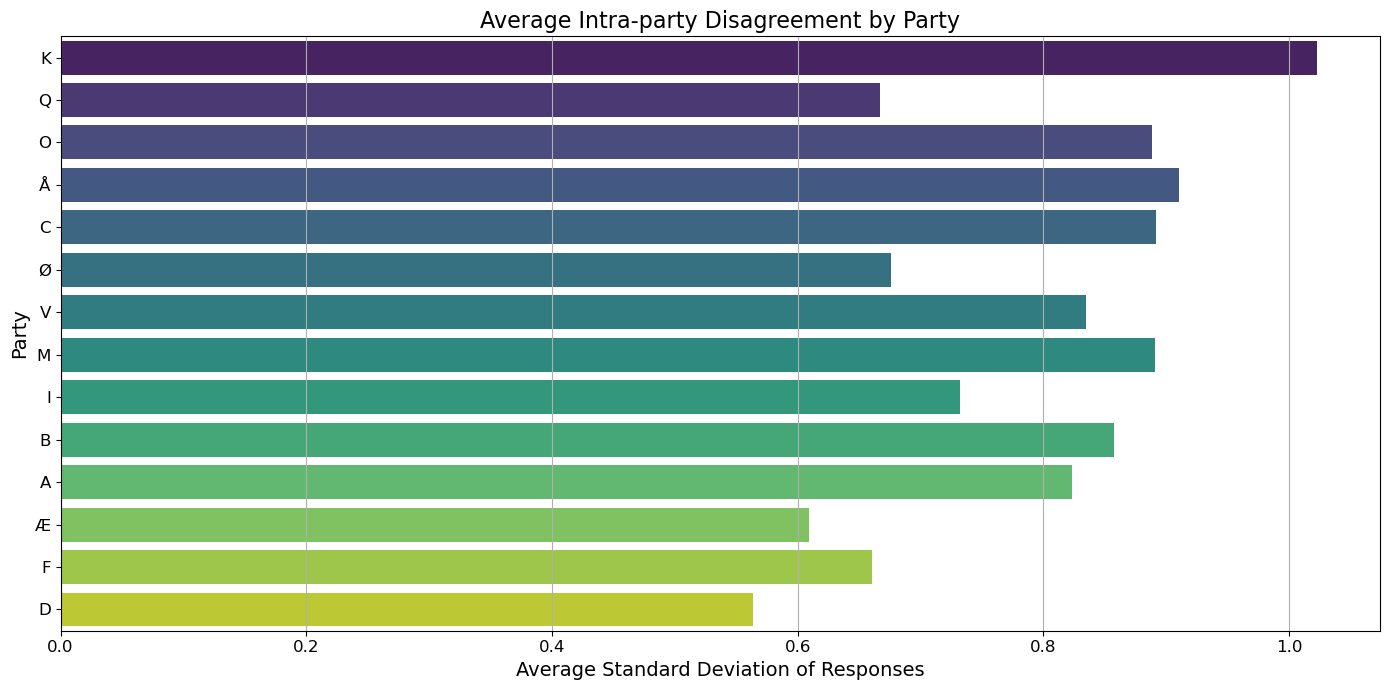

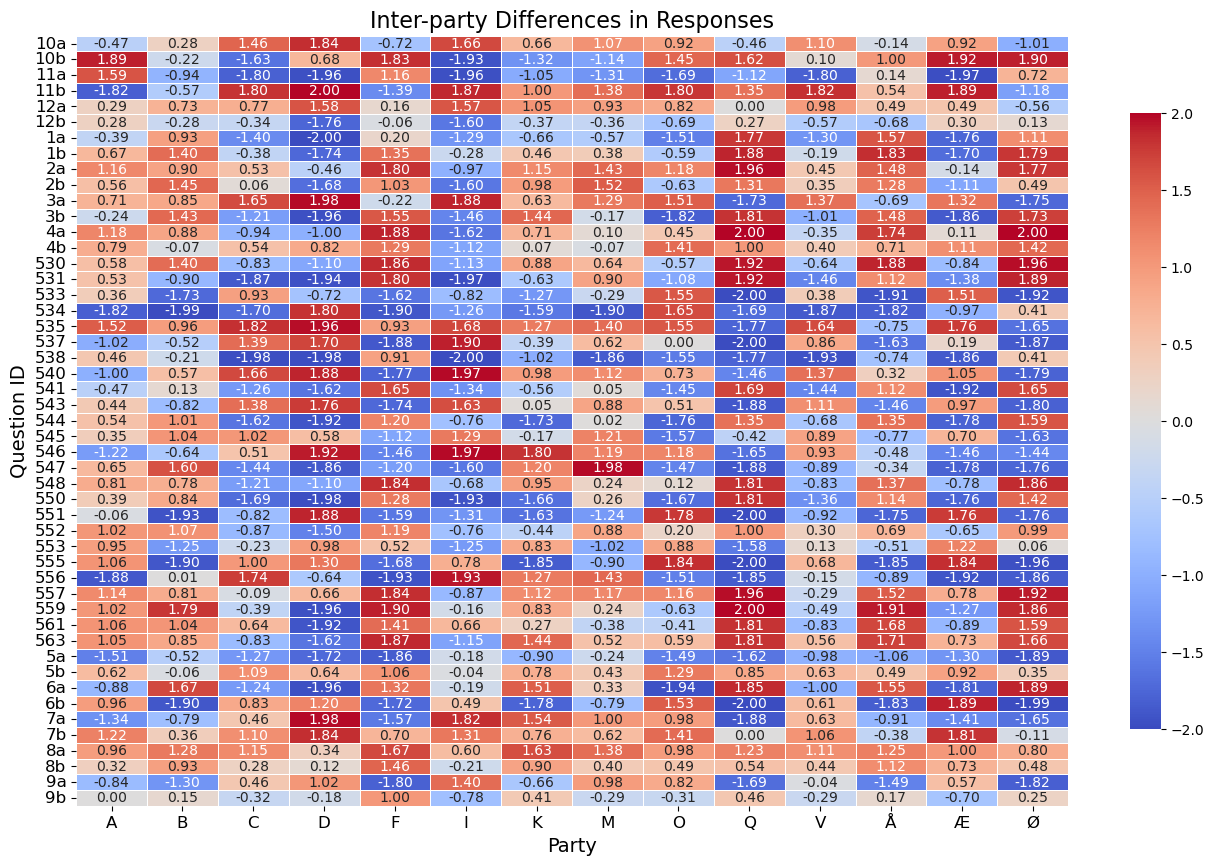

In [26]:
questionsDR = pd.read_excel('drq.xlsx')
questionsTV = pd.read_excel('tv2q.xlsx')

data_filtered_differences = data_filtered.loc[data_filtered['alder'] != 0]
data_filtered_differences = data_filtered_differences.loc[data_filtered['parti'] != 'Løsgænger']
data_filtered_differences = data_filtered_differences.dropna()
data_filtered_differences.head()

questionsDR_filtered = questionsDR[['ID', 'Question', 'ArgumentFor', 'ArgumentAgainst']].copy()
questionsTV_filtered = questionsTV[['id', 'question']].copy()

questionsDR_filtered['ID'] = questionsDR_filtered['ID'].astype(str).str.strip()
questionsTV_filtered['id'] = questionsTV_filtered['id'].astype(str).str.strip()
questionsTV_filtered.rename(columns={'id': 'ID', 'question': 'Question'}, inplace=True)

non_answer_columns = ['navn', 'parti', 'storkreds', 'alder']
data_filtered_melted = data_filtered_differences.melt(id_vars=non_answer_columns, 
                                           var_name='ID', 
                                           value_name='answer')

questionsDR_cleaned = questionsDR_filtered[['ID', 'Question']]
questionsTV_cleaned = questionsTV_filtered[['ID', 'Question']]

merged_questions = pd.concat(
    [questionsDR_cleaned, questionsTV_cleaned],
    ignore_index=True
).drop_duplicates(subset=['ID'], keep='first')

merged_data = pd.merge(data_filtered_melted, merged_questions, on='ID', how='outer')

merged_data = merged_data.dropna(subset=['answer', 'Question'])

merged_data['answer'] = pd.to_numeric(merged_data['answer'], errors='coerce')

grouped_data = merged_data.groupby(['parti', 'ID'])['answer'].agg(['mean', 'std', 'count']).reset_index()

intra_party_disagreements = grouped_data.groupby('parti')['std'].agg(['mean', 'max']).reset_index()
intra_party_disagreements.rename(columns={'mean': 'Average Intra-party Disagreement', 'max': 'Max Intra-party Disagreement'}, inplace=True)

inter_party_differences = grouped_data.pivot_table(index='ID', columns='parti', values='mean')
inter_party_differences.fillna(0, inplace=True)

most_disagreement_parties = intra_party_disagreements.sort_values(by='Max Intra-party Disagreement', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='Average Intra-party Disagreement', y='parti', data=most_disagreement_parties, palette='viridis')
plt.title('Average Intra-party Disagreement by Party', fontsize=16)
plt.xlabel('Average Standard Deviation of Responses', fontsize=14)
plt.ylabel('Party', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
sns.heatmap(inter_party_differences, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Inter-party Differences in Responses', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Question ID', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()